# 데이터 분석 및 시각화

In [21]:
import glob, os, sys, cv2, random
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import seaborn as sns

from PIL import Image

In [22]:
dir = 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset'
save_dir= 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/link/data_visualization'
type_1 = ['dent', 'scratch','spacing']
type_2 = ['train', 'test', 'valid']
type_3 = ['images', 'masks']

folder_list = []
name_list=[]

In [97]:
def change_sp_jpg():
    '''
    spacing만 jpeg 파일이어서 jpg로 변경해주기(train,test,valid - images, masks전부다)
    '''
    for i in range(len(type_2)):
        for j in range(len(type_3)):
            image_path =f'{dir}/spacing/{type_2[i]}/{type_3[j]}'
            image_file = os.listdir(image_path)
    #         print(f'{dir}/spacing/{type_2[i]}/{type_3[j]}')
            for file in image_file:
                jpgs = file.split('.')[-1] # 확장자
                dst_name = file.replace(jpgs, 'jpg')
                os.rename(image_path+file, image_path+dst_name)


# change_sp_jpg()

## floder list 만들기

In [24]:
for i in type_1:
    for j in type_2:
        for k in type_3:
            folder_list.append(f'{dir}/{i}/{j}/{k}/')
            name_list.append(f'{i}_{j}_{k}')

In [25]:
folder_list

['C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/train/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/train/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/test/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/test/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/valid/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/dent/valid/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/train/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/train/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/test/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/test/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/valid/images/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/scratch/valid/masks/',
 'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/spacing/trai

In [26]:
for i in range(len(name_list)):
    name_list[i]= glob.glob(folder_list[i]+'*.jpg')

In [27]:
#
de_tr_img = name_list[0]
de_tr_msk = name_list[1]
de_te_img = name_list[2]
de_te_msk = name_list[3]
de_val_img = name_list[4]
de_val_msk = name_list[5]
sc_tr_img = name_list[6]
sc_tr_msk = name_list[7]
sc_te_img = name_list[8]
sc_te_msk = name_list[9]
sc_val_img = name_list[10]
sc_val_msk = name_list[11]
sp_tr_img = name_list[12]
sp_tr_msk = name_list[13]
sp_te_img = name_list[14]
sp_te_msk = name_list[15]
sp_val_img = name_list[16]
sp_val_msk = name_list[17]

## 파일 개수 확인하기

In [28]:
print("de_tr_img : ", len(de_tr_img))
print("de_tr_msk : ", len(de_tr_msk))
print("de_te_img : ", len(de_te_img))
print("de_te_msk : ", len(de_te_msk))
print("de_val_img : ", len(de_val_img))
print("de_val_msk : ", len(de_val_msk))
print("sc_tr_img : ", len(sc_tr_img))
print("sc_tr_msk : ", len(sc_tr_msk))
print("sc_te_img : ", len(sc_te_img))
print("sc_te_msk : ", len(sc_te_msk))
print("sc_val_img : ", len(sc_val_img))
print("sc_val_msk : ", len(sc_val_msk))
print("sp_tr_img : ", len(sp_tr_img))
print("sp_tr_msk : ", len(sp_tr_msk))
print("sp_te_img : ", len(sp_te_img))
print("sp_te_msk : ", len(sp_te_msk))
print("sp_val_img : ", len(sp_val_img))
print("sp_val_msk : ", len(sp_val_msk))


de_tr_img :  2132
de_tr_msk :  2132
de_te_img :  267
de_te_msk :  267
de_val_img :  267
de_val_msk :  267
sc_tr_img :  2132
sc_tr_msk :  2132
sc_te_img :  267
sc_te_msk :  267
sc_val_img :  267
sc_val_msk :  267
sp_tr_img :  1232
sp_tr_msk :  1232
sp_te_img :  155
sp_te_msk :  155
sp_val_img :  153
sp_val_msk :  153


# 정상적으로 데이터를 가져왔는지 확인하기

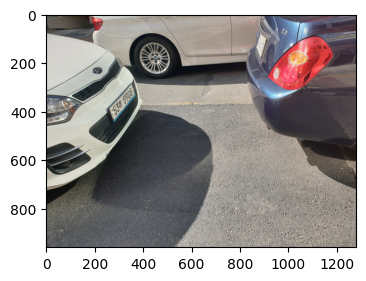

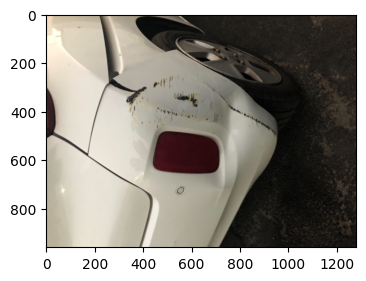

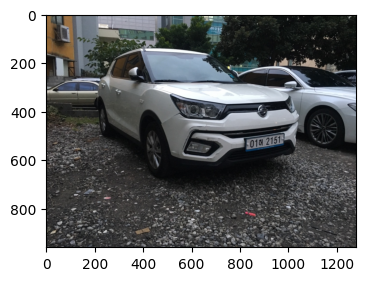

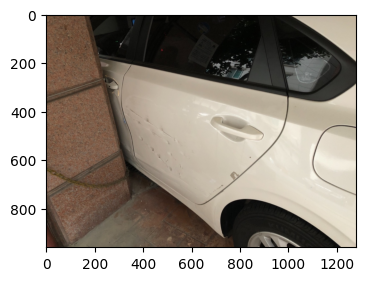

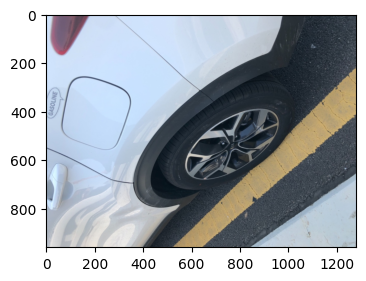

In [29]:
for i in random.sample(sp_tr_img,5):
    plt.figure(figsize=(4,4))
    file_path = img.imread(i)
    plt.imshow(file_path)

# 정상 이미지와 파손 이미지 비율 구해보기

In [86]:
def draw_pie_normal_abnormal(dir, damage, type, img): 
    if img == "masks":# 마스크 이미지만  # and damage =="spacing" and type== "train": 
        mask_list = glob.glob(dir+'*')
        cnt_normal=0
        cnt_abnormal =0
        for i in mask_list:
            mask= cv2.imread(i)
            if (mask == 0).all():
                cnt_normal += 1  
            else:# 파손
                cnt_abnormal +=1 
                # ##### spacing의 파손이미지만 train에 저장해서 학습해보려고 추가함
                # file = i.split('\\')[-1]
                # img = cv2.imread(f'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/{damage}/{type}/images/{file}')
                # save_file_1 = f'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/spacing/train_damage/images/{file}'
                # save_file_2 = f'C:/Users/SUN/Desktop/SUN/aiffel/SOCAR_Project/dataset/spacing/train_damage/masks/{file}'
                # cv2.imwrite(save_file_1,img)
                # cv2.imwrite(save_file_2,mask)
                ########
        
        print(f"{damage.upper()} {type}의 총 이미지 개수 : {len(mask_list)}")
        print(f"정상 이미지 개수 : {cnt_normal} 비정상 이미지 개수 :{cnt_abnormal}")
        
        ratio =[]
        labels =['Normal', 'Abnormal']
        colors = ['#d395d0', '#ff9999']
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
        ratio.append(cnt_normal)
        ratio.append(cnt_abnormal)
        plt.figure(figsize=(2,2))
        plt.title(f"{damage.caplitalize()} - {type}", pad =10, fontsize=12)
            # 비율 퍼센트로 나옴
        # plt.pie(ratio, labels=labels, autopct= lambda x: '{:1.1.f}', colors=colors, 
        #         wedgeprops=wedgeprops, textprops={'size':8})
            # 비율 숫자로 나옴   
        plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors, 
                wedgeprops=wedgeprops, textprops={'size':8})
        plt.savefig(f'{save_dir}/result/normal_abnormal_ratio/{damage} {type} normal & abnormal ratio.png', 
                    facecolor='#eeeeee', bbox_inches='tight', pad_inches=0.1,
                    dpi = 800, format='png')
        plt.show()
        

DENT train의 총 이미지 개수 : 2132
정상 이미지 개수 : 1564 비정상 이미지 개수 :568


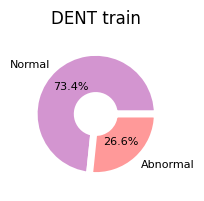

DENT test의 총 이미지 개수 : 267
정상 이미지 개수 : 188 비정상 이미지 개수 :79


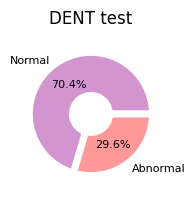

DENT valid의 총 이미지 개수 : 267
정상 이미지 개수 : 194 비정상 이미지 개수 :73


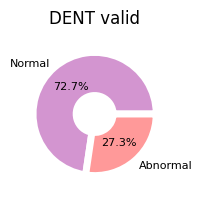

SCRATCH train의 총 이미지 개수 : 2132
정상 이미지 개수 : 567 비정상 이미지 개수 :1565


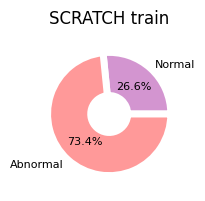

SCRATCH test의 총 이미지 개수 : 267
정상 이미지 개수 : 70 비정상 이미지 개수 :197


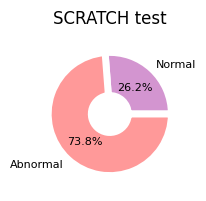

SCRATCH valid의 총 이미지 개수 : 267
정상 이미지 개수 : 74 비정상 이미지 개수 :193


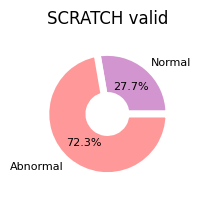

SPACING train의 총 이미지 개수 : 1232
정상 이미지 개수 : 560 비정상 이미지 개수 :672


SPACING test의 총 이미지 개수 : 155
정상 이미지 개수 : 69 비정상 이미지 개수 :86


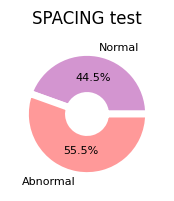

SPACING valid의 총 이미지 개수 : 153
정상 이미지 개수 : 71 비정상 이미지 개수 :82


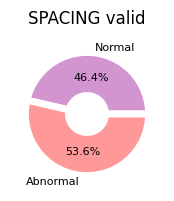

In [87]:
for i in folder_list:
    damage =i.split('/')[-4]
    d_type = i.split('/')[-3]
    i_m = i.split('/')[-2]
    draw_pie_normal_abnormal(i,damage, d_type, i_m)

# 한 이미지당 파손 비율

In [94]:
def bg_ratio(root_dir):
    size_dict = {}
    size_dict['dent'] = {}
    size_dict['scratch'] = {}
    size_dict['spacing'] = {}
    
    for damage_ in ['dent', 'scratch', 'spacing']:
        for train_ in ['train', 'valid', 'test']:
            
            label_dir = os.listdir(os.path.join(root_dir, damage_, train_, 'masks'))
            class_ratio = []
            for i in label_dir:
                if i == '.DS_Store':
                    continue
                mask_ = os.path.join(root_dir, damage_, train_, 'masks', i)
                mask_ = Image.open(mask_)
                mask_ = (np.array(mask_.convert('L')) != 0).astype('uint8')

                class_ratio.append((mask_ != 0).sum() / (mask_.shape[0] * mask_.shape[1]))
            size_dict[damage_][train_] = class_ratio

            plt.figure(figsize=(2,2))
            plt.xlim([0.0, 0.3])
            plt.xticks(np.arange(0, 0.33, 0.08))
            plt.ylim([0.0, 1.0])
            sns.histplot(data=size_dict[damage_][train_], bins=5, stat='probability',color='lightcoral')
            plt.title(f'{damage_.capitalize()} - {train_}')
            
            plt.savefig(f'{save_dir}/result/damage_ratio/{damage_}_{train_}_damage_ratio.png', 
                        facecolor='#eeeeee', dpi = 300, format='png', 
                         bbox_inches='tight', pad_inches=0.1)
            plt.show()
    # return size_dict


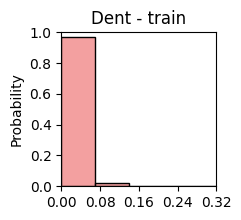

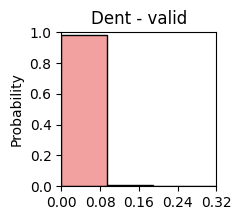

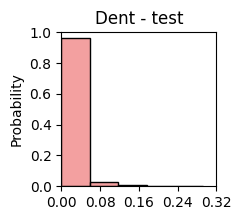

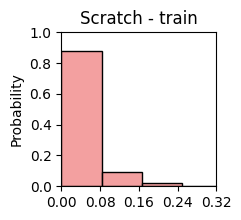

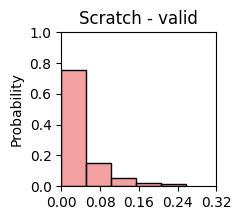

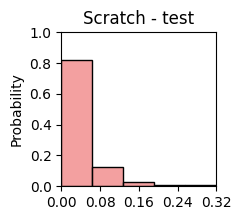

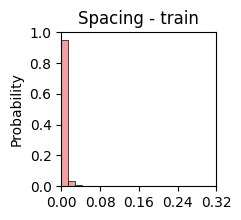

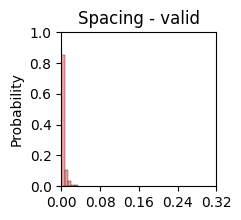

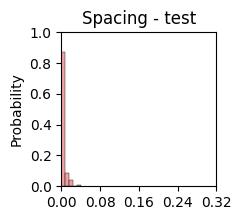

In [95]:
bg_ratio(dir+"/")

In [16]:
# path = "/aiffel/aiffel/final_project/dataset/accida_segmentation_dataset_v1/spacing/valid/images/.jpg"
# if os.path.isfile(path):
#     print(path)
#     os.remove(path)

# 원본 이미지, 마스크 이미지, 마스킹 이미지 시각화(정상, 파손 랜덤으로 추출)

In [17]:
def plt_image(num, damage, type, img):
    if img == "images":
        return None
    else :
        print(damage, type, img)
        separated_file= os.listdir(f'{dir}/{damage}/{type}/images/')
        img_list = []
        for i in random.sample(separated_file,num):
            img_list.append(i)
        img_list = sorted(img_list)

        separated_mask_file= os.listdir(f'{dir}/{damage}/{type}/masks/')
        mask_list=[]
        for i in separated_mask_file:
            for j in img_list:
                if j == i:
                    mask_list.append(i)
                else :
                    pass    
        mask_list = sorted(mask_list)

        for i in range(num):
            plt.figure(figsize=(10,10))
            plt.subplot(1, 3, 1)    
            plt.title('origin')
            origin_path = f'{dir}/{damage}/{type}/images/'
            img_file_path = cv2.imread(origin_path+img_list[i])
            plt.imshow(img_file_path)

            plt.subplot(1,3,2)                
            plt.title('mask')
            origin_mask_path = f'{dir}/{damage}/{type}/masks/'
            mask_list_path =cv2.imread(origin_mask_path+mask_list[i])
            plt.imshow(mask_list_path)

            plt.subplot(1,3,3)  
            plt.title(f'{damage} {type} masking_{i}')
            src1= cv2.imread(origin_path+img_list[i])
            src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
            src2 = cv2.imread(origin_mask_path+mask_list[i])
            if src1 is None or src2 is None:
                print('Image load fauled!')
                sys.exit()
            dst = cv2.addWeighted(src1,1,src2,1,0.0)
            plt.imshow(dst)
            plt.savefig(f'{save_dir}/result/masking_plt/{damage} {type} masking_{i}.png', 
                    facecolor='#eeeeee', 
                    dpi = 300, format='png')

        plt.tight_layout()
        plt.show() 

dent train masks


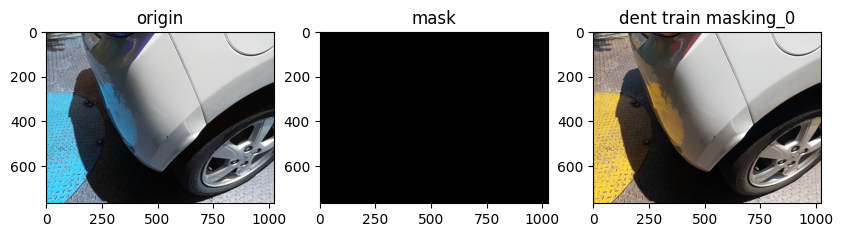

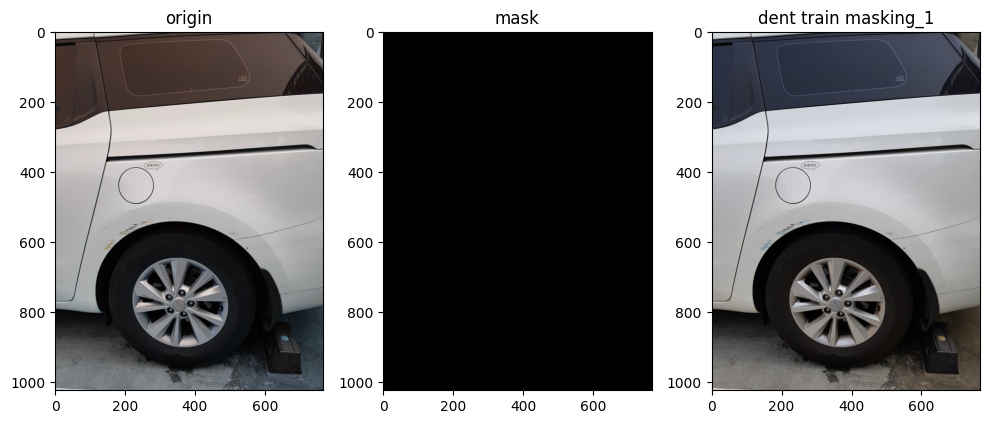

dent test masks


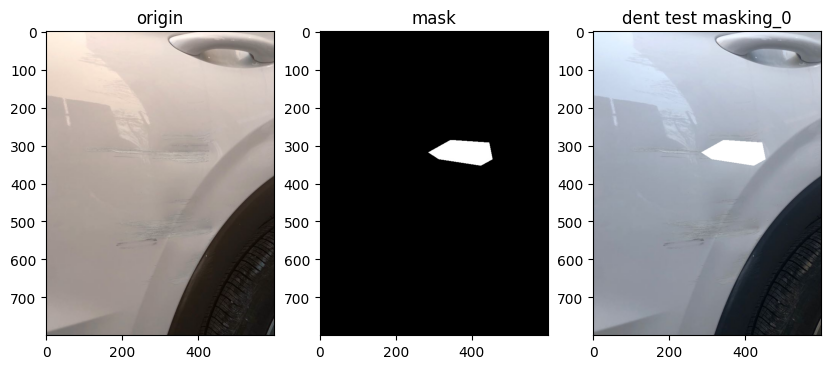

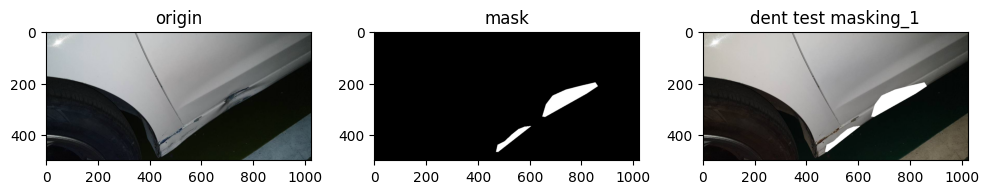

dent valid masks


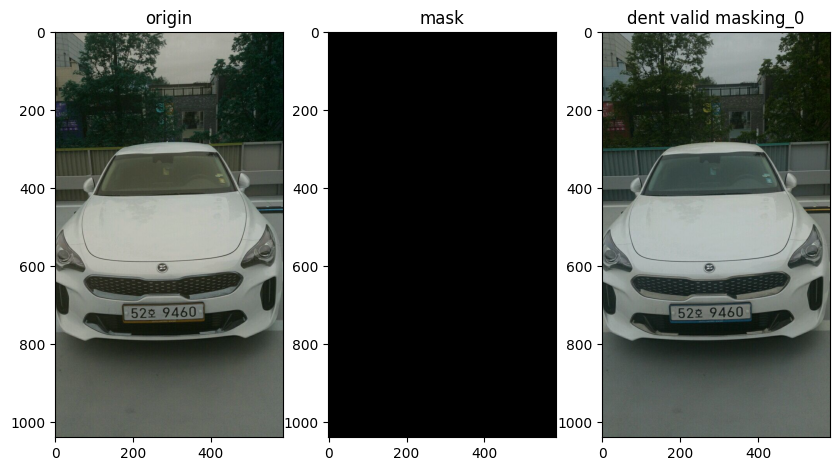

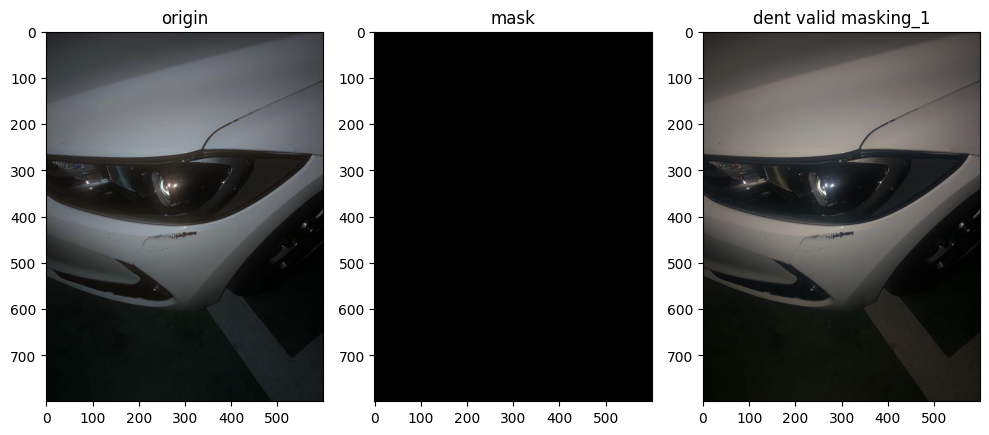

scratch train masks


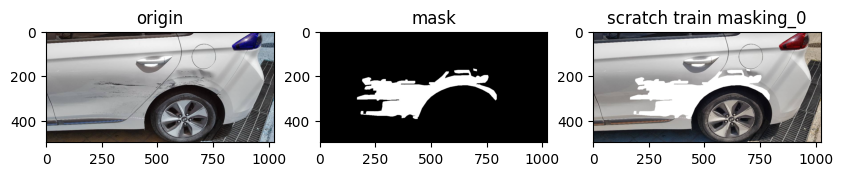

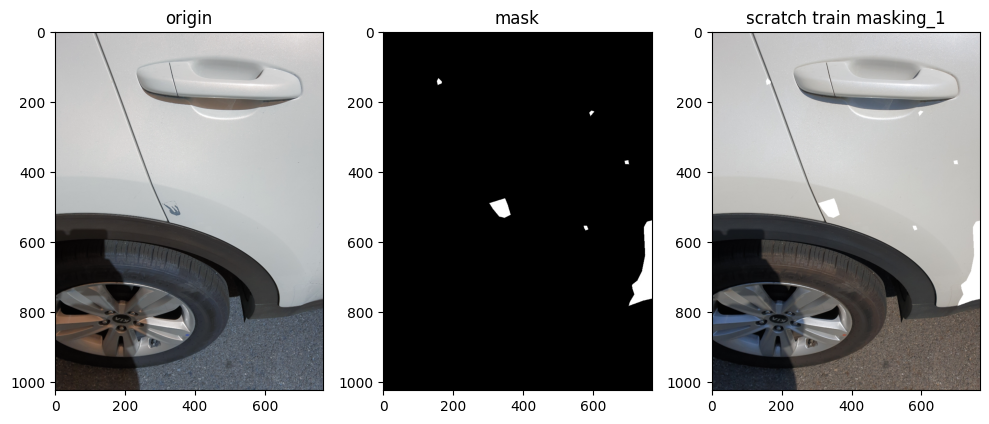

scratch test masks


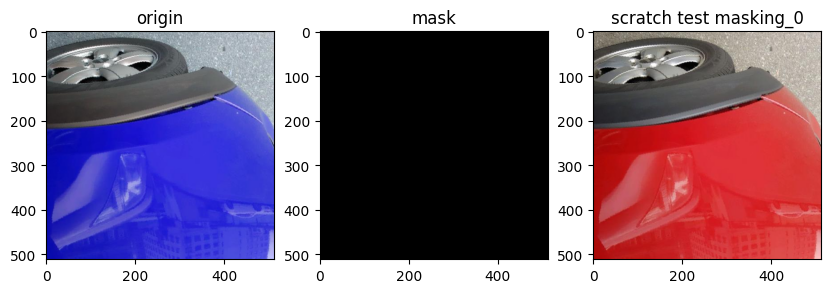

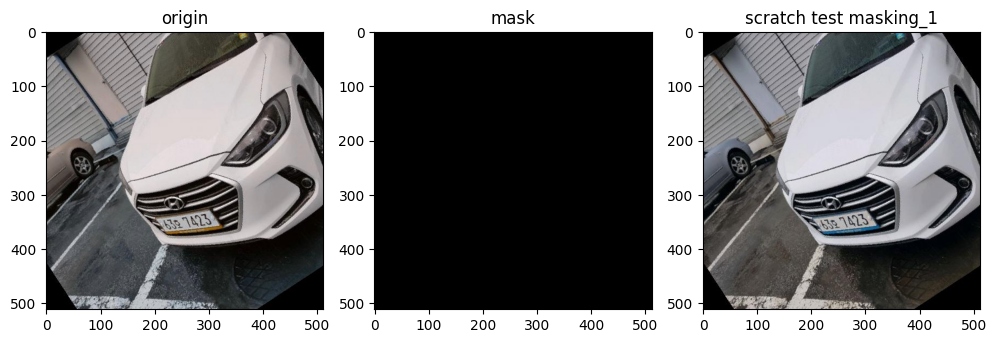

scratch valid masks


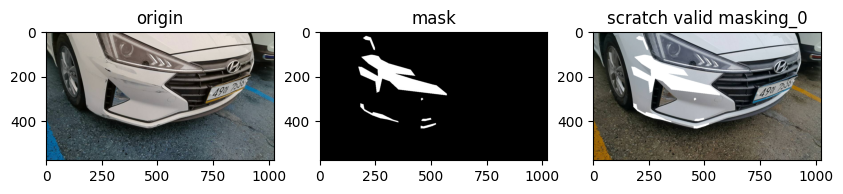

spacing train masks


spacing test masks


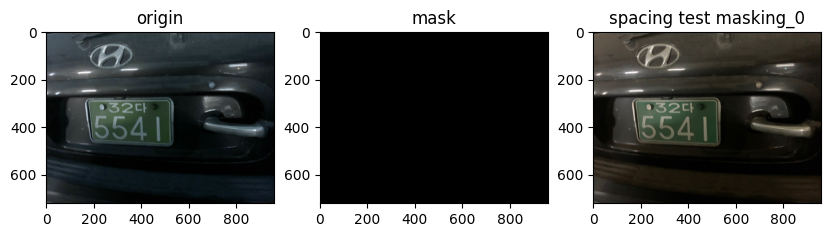

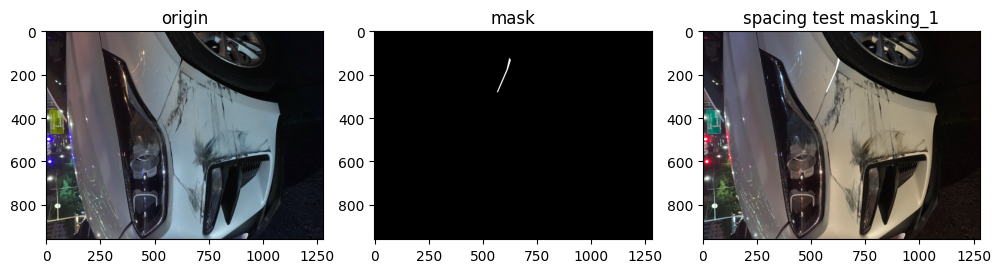

spacing valid masks


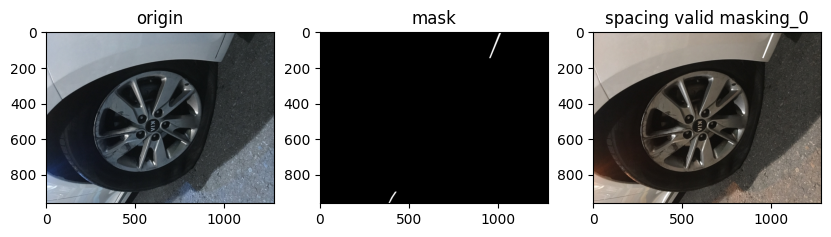

In [18]:
# 결과 이미지 저장하는 경로에 파일이 존재하면 비우기
if os.listdir(f"{save_dir}/result/masking_plt"):
    [os.remove(f) for f in glob.glob(f"{save_dir}/result/masking_plt/*.png")]
else:
    pass

# 원본 + 마스크 + 마스킹이미지 plt로 뽑기
for i in folder_list:
    damage =i.split('/')[-4]
    d_type = i.split('/')[-3]
    i_m = i.split('/')[-2]
    plt_image(2,damage,d_type,i_m)

# 각 폴더별 이미지 크기 평균 구해보기(images만)

In [19]:
def size_image(dir):
    damage = dir.split('/')[-4]
    type = dir.split('/')[-3]
    img_mask = dir.split('/')[-2]

    if img_mask == "images" : # images == masks
        file_list = glob.glob(dir+'*')
        cnt =0 
        h_list =[]
        w_lsit = []
        for i in file_list:
            cnt+=1
            file = i.split('\\')[-1]
            img = cv2.imread(dir+file, cv2.IMREAD_COLOR)
            h,w,c = img.shape
            h_list.append(h)
            w_lsit.append(w)
    else : 
        return None    

    print(f'{damage} {type} {img_mask}')
    print(f" height 최솟값 : {min(h_list)} , 최댓값 : {max(h_list)} , 평균 : {int(sum(h_list)/len(h_list))}")
    print(f" width 최솟값 : {min(w_lsit)} , 최댓값 : {max(w_lsit)} , 평균 : {int(sum(w_lsit)/len(w_lsit))}\n")

In [20]:
for i in folder_list:
    size_image(i) 

dent train images
 height 최솟값 : 374 , 최댓값 : 1024 , 평균 : 725
 width 최솟값 : 459 , 최댓값 : 1152 , 평균 : 789

dent test images
 height 최솟값 : 484 , 최댓값 : 1024 , 평균 : 736
 width 최솟값 : 497 , 최댓값 : 1024 , 평균 : 785

dent valid images
 height 최솟값 : 390 , 최댓값 : 1040 , 평균 : 730
 width 최솟값 : 292 , 최댓값 : 1024 , 평균 : 801

scratch train images
 height 최솟값 : 374 , 최댓값 : 1024 , 평균 : 725
 width 최솟값 : 459 , 최댓값 : 1152 , 평균 : 789

scratch test images
 height 최솟값 : 484 , 최댓값 : 1024 , 평균 : 736
 width 최솟값 : 497 , 최댓값 : 1024 , 평균 : 785

scratch valid images
 height 최솟값 : 390 , 최댓값 : 1040 , 평균 : 730
 width 최솟값 : 292 , 최댓값 : 1024 , 평균 : 801

spacing train images
 height 최솟값 : 381 , 최댓값 : 1280 , 평균 : 925
 width 최솟값 : 576 , 최댓값 : 1280 , 평균 : 1249

spacing test images
 height 최솟값 : 540 , 최댓값 : 1280 , 평균 : 934
 width 최솟값 : 622 , 최댓값 : 1280 , 평균 : 1234

spacing valid images
 height 최솟값 : 540 , 최댓값 : 1280 , 평균 : 914
 width 최솟값 : 721 , 최댓값 : 1280 , 평균 : 1251

